<a href="https://colab.research.google.com/github/ThiagoVenturim/studying_python_data/blob/main/Alura/AluraAula1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

df.head(5)



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [5]:
linhas, colunas = df.shape # passar as informações do shape para as variaveis
print(f"O dataframe possui {linhas} linhas e {colunas} colunas.")

O dataframe possui 133349 linhas e 11 colunas.


In [6]:
df.columns #verificar o nome das colunas

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [7]:
renomear ={ #criei um dicionario para traduzir
    'work_year': 'ano_de_trabalho',
    'experience_level': 'nível_de_experiência',
    'employment_type': 'tipo_de_emprego',
    'job_title': 'cargo_profissional',
    'salary': 'salário',
    'salary_currency': 'moeda_do_salário',
    'salary_in_usd': 'salário_em_usd',
    'employee_residence': 'residência_do_funcionário',
    'remote_ratio': 'proporção_remota',
    'company_location': 'local_da_empresa',
    'company_size': 'porte_da_empresa'
    }

df.rename(columns=renomear, inplace=True) #usei o rename para renomear
df.columns

Index(['ano_de_trabalho', 'nível_de_experiência', 'tipo_de_emprego',
       'cargo_profissional', 'salário', 'moeda_do_salário', 'salário_em_usd',
       'residência_do_funcionário', 'proporção_remota', 'local_da_empresa',
       'porte_da_empresa'],
      dtype='object')

In [8]:
df["nível_de_experiência"].value_counts()

nível_de_experiência
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [9]:
df["tipo_de_emprego"].value_counts()

tipo_de_emprego
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [10]:
df["proporção_remota"].value_counts()

proporção_remota
0      105312
100     27718
50        319
Name: count, dtype: int64

In [11]:
remoto = {
    0: "Remoto",
    50: "Semi-Remoto",
    100: "Presencial"
}
df["proporção_remota"] = df["proporção_remota"].map(remoto)
df["proporção_remota"].value_counts()

proporção_remota
Remoto         105312
Presencial      27718
Semi-Remoto       319
Name: count, dtype: int64

In [12]:
senioridade = {
    "EN": "Junior",
    "MI": "Pleno",
    "SE": "Sênior",
    "EX": "Executivo"
}
df["nível_de_experiência"] = df["nível_de_experiência"].replace(senioridade)
df["nível_de_experiência"].value_counts()


nível_de_experiência
Sênior       77241
Pleno        40465
Junior       12443
Executivo     3200
Name: count, dtype: int64

In [13]:
emprego_tipo= {
    "FT": "Tempo Integral",
     "PT": "Tempo Parcial",
     "FL": "Freelance",
     "CT": "Contrato"
}
df["tipo_de_emprego"]= df["tipo_de_emprego"].replace(emprego_tipo)
df["tipo_de_emprego"].value_counts()

tipo_de_emprego
Tempo Integral    132563
Contrato             394
Tempo Parcial        376
Freelance             16
Name: count, dtype: int64

In [14]:
tamanho_da_empresa= {
    "S": "Pequeno",
    "M": "Médio",
    "L": "Grande"
}

df["porte_da_empresa"] = df["porte_da_empresa"].replace(tamanho_da_empresa)
df["porte_da_empresa"].value_counts()

porte_da_empresa
Médio      129561
Grande       3574
Pequeno       214
Name: count, dtype: int64

In [15]:
df.head(5)

,ano_de_trabalho,nível_de_experiência,tipo_de_emprego,cargo_profissional,salário,moeda_do_salário,salário_em_usd,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Presencial,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Presencial,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Remoto,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Remoto,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Remoto,US,Médio


In [16]:
df.describe(include = "object")

,nível_de_experiência,tipo_de_emprego,cargo_profissional,moeda_do_salário,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Remoto,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Parte 2

In [17]:
df.isnull() # verificar onde tem dados nulos

,ano_de_trabalho,nível_de_experiência,tipo_de_emprego,cargo_profissional,salário,moeda_do_salário,salário_em_usd,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

ano_de_trabalho              10
nível_de_experiência          0
tipo_de_emprego               0
cargo_profissional            0
salário                       0
moeda_do_salário              0
salário_em_usd                0
residência_do_funcionário     0
proporção_remota              0
local_da_empresa              0
porte_da_empresa              0
dtype: int64

In [19]:
df["ano_de_trabalho"].unique() # verrificar onde estao os dados nulos

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [20]:
df[df.isnull().any(axis=1)] # mostrar os dados nulos

,ano_de_trabalho,nível_de_experiência,tipo_de_emprego,cargo_profissional,salário,moeda_do_salário,salário_em_usd,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Remoto,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Remoto,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Remoto,US,Médio
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Remoto,US,Médio
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Remoto,US,Médio
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Remoto,US,Médio
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Remoto,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Presencial,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Presencial,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Semi-Remoto,US,Grande


In [21]:
df_salario = pd.DataFrame({ # criar um data frame sintetico
    'nome': ["Thiago", "Leticia", "Osmar"],
    'salario': [ 4000, np.nan , 5000]
})

df_salario['salario_media'] = df_salario['salario'].fillna(df_salario['salario'].median()) # mediana pq e salario mean se fosse media

df_salario

,nome,salario,salario_media
0,Thiago,4000.0,4000.0
1,Leticia,NaN,4500.0
2,Osmar,5000.0,5000.0


In [22]:
df_temperatura = pd.DataFrame({
    "Dia": ["Seg", "Ter", "Quar", " Quin", "Sex", "Sab","Dom"],
    "Temperatura": [30, 40, 35, np.nan, 30, np.nan, 22]
})
df_temperatura["preenchido_ffill"] = df_temperatura["Temperatura"].ffill() #ffill faz recoreencia

df_temperatura

,Dia,Temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,40.0,40.0
2,Quar,35.0,35.0
3,Quin,NaN,35.0
4,Sex,30.0,30.0
5,Sab,NaN,30.0
6,Dom,22.0,22.0


In [23]:
df_cidade = pd.DataFrame ({
    'nome': ["Thiago", "Leticia", "Osmar"],
    'cidade': ["Belo Horizonte", "Sao Paulo", np.nan]
})

df_cidade["cidade_preenchida"]= df_cidade['cidade'].fillna("Nao informado")
df_cidade

,nome,cidade,cidade_preenchida
0,Thiago,Belo Horizonte,Belo Horizonte
1,Leticia,Sao Paulo,Sao Paulo
2,Osmar,NaN,Nao informado


In [24]:
df_limpo = df.dropna() #usare o dropna para dropar/tirar todos os dados nulos
df_limpo.isnull().sum()

ano_de_trabalho              0
nível_de_experiência         0
tipo_de_emprego              0
cargo_profissional           0
salário                      0
moeda_do_salário             0
salário_em_usd               0
residência_do_funcionário    0
proporção_remota             0
local_da_empresa             0
porte_da_empresa             0
dtype: int64

In [25]:
df_limpo.head(5)

,ano_de_trabalho,nível_de_experiência,tipo_de_emprego,cargo_profissional,salário,moeda_do_salário,salário_em_usd,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Presencial,US,Médio
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Presencial,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Remoto,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Remoto,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Remoto,US,Médio


In [26]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ano_de_trabalho            133339 non-null  float64
 1   nível_de_experiência       133339 non-null  object 
 2   tipo_de_emprego            133339 non-null  object 
 3   cargo_profissional         133339 non-null  object 
 4   salário                    133339 non-null  int64  
 5   moeda_do_salário           133339 non-null  object 
 6   salário_em_usd             133339 non-null  int64  
 7   residência_do_funcionário  133339 non-null  object 
 8   proporção_remota           133339 non-null  object 
 9   local_da_empresa           133339 non-null  object 
 10  porte_da_empresa           133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [27]:
df_limpo = df_limpo.assign(ano_de_trabalho = df_limpo['ano_de_trabalho'].astype('int64')) #troquei o dado tipo float64 paara int64
df_limpo.head(5)

,ano_de_trabalho,nível_de_experiência,tipo_de_emprego,cargo_profissional,salário,moeda_do_salário,salário_em_usd,residência_do_funcionário,proporção_remota,local_da_empresa,porte_da_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Presencial,US,Médio
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Presencial,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Remoto,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Remoto,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Remoto,US,Médio


# Parte 3

<Axes: title={'center': 'Grafico de barras nivel de experiencia'}, xlabel='nível_de_experiência'>

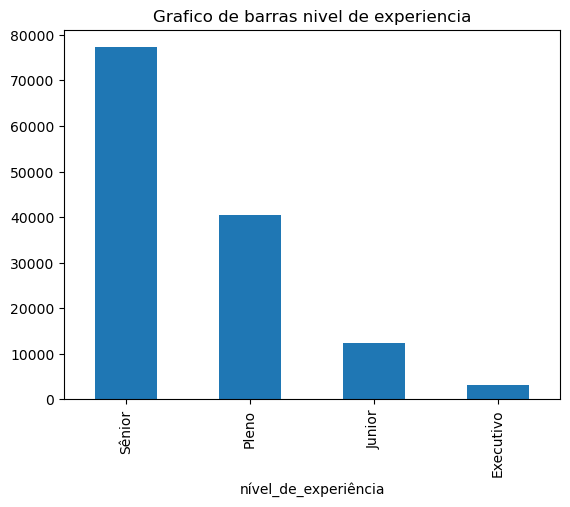

In [28]:
df_limpo["nível_de_experiência"].value_counts().plot(kind="bar", title="Grafico de barras nivel de experiencia")

<Axes: xlabel='tipo_de_emprego', ylabel='salário_em_usd'>

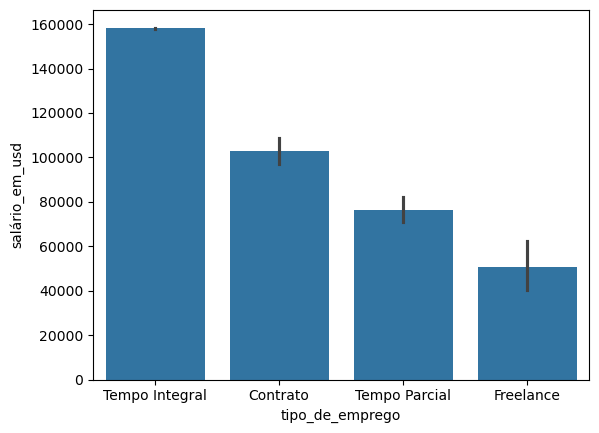

In [29]:
sns.barplot(x="tipo_de_emprego", y="salário_em_usd", data=df_limpo)

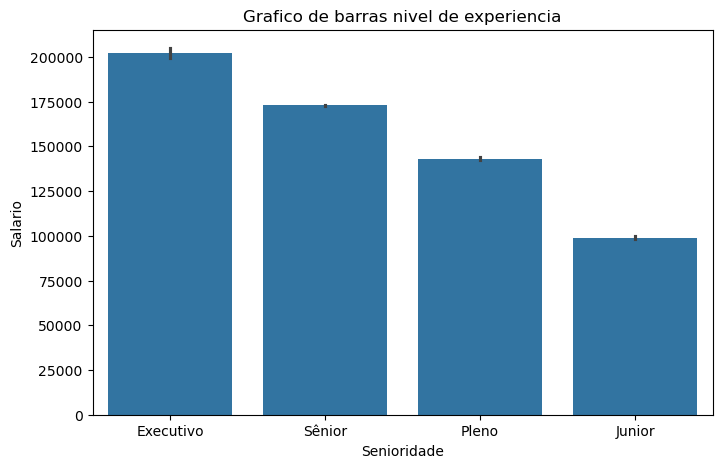

In [30]:
SenioridaOrdenado = df_limpo.groupby("nível_de_experiência")["salário_em_usd"].mean().sort_values(ascending=False)
plt.figure(figsize= (8, 5))
sns.barplot(data=df_limpo, x="nível_de_experiência", y="salário_em_usd", order= SenioridaOrdenado.index)
plt.title("Grafico de barras nivel de experiencia")
plt.xlabel("Senioridade")
plt.ylabel("Salario")
plt.show()

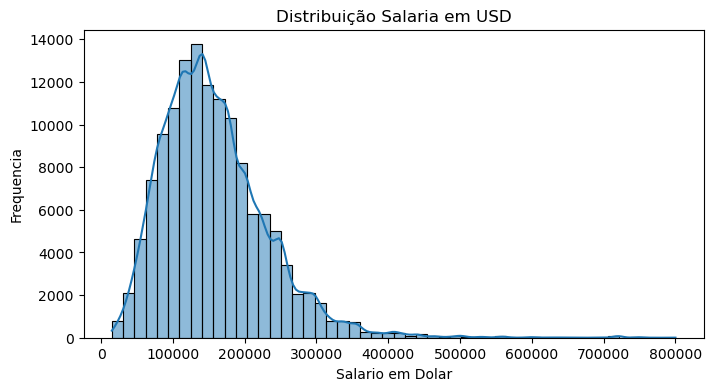

In [31]:
plt.figure(figsize= (8,4))
sns.histplot(df_limpo["salário_em_usd"] , bins=50 , kde=True)
plt.title("Distribuição Salaria em USD")
plt.xlabel("Salario em Dolar")
plt.ylabel("Frequencia")
plt.show()

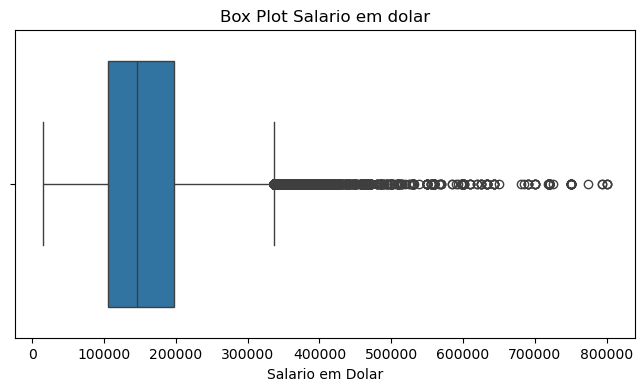

In [32]:
plt.figure(figsize= (8,4))
sns.boxplot(x = df_limpo["salário_em_usd"])
plt.title("Box Plot Salario em dolar")
plt.xlabel("Salario em Dolar")
plt.show()

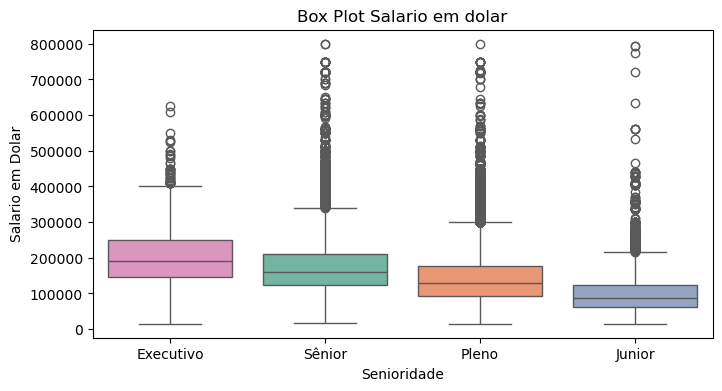

In [33]:
ordem_senioridade = ["Executivo", "Sênior", "Pleno", "Junior"]
plt.figure( figsize= (8,4))
sns.boxplot(x="nível_de_experiência", y="salário_em_usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="nível_de_experiência")
plt.title("Box Plot Salario em dolar")
plt.xlabel("Senioridade")
plt.ylabel("Salario em Dolar")
plt.show()

In [34]:
senioridade_media_salarial = df_limpo.groupby("nível_de_experiência")["salário_em_usd"].mean().sort_values(ascending=False).reset_index()
fig = px.bar(senioridade_media_salarial,
             x="nível_de_experiência",
             y="salário_em_usd",
             title="Média Salarial por Senioridade",
             )
fig.show()

In [35]:
df_limpo.to_csv("salarios_limpo.csv", index=False) #exportar o arquivo limpo para csv